In [1]:
!pip install scikit-learn catboost xgboost --quiet

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jovian
import seaborn as sns
# Modelling
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
output_df = df['math_score']
df.drop(columns='math_score', inplace = True)
input_df = df

In [5]:
output_df

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
input_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
categorical_cols = [i for i in input_df if input_df[i].dtype == 'O']
numerical_cols = [i for i in input_df if input_df[i].dtype != 'O']
categorical_cols
numerical_cols

['reading_score', 'writing_score']

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler



In [9]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(input_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

In [10]:
input_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,...,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,female,group B,bachelor's degree,standard,none,72,74,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,female,group C,some college,standard,completed,90,88,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,female,group B,master's degree,standard,none,95,93,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,57,44,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,78,75,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,male,group C,high school,free/reduced,none,55,55,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,female,group C,high school,free/reduced,completed,71,65,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,female,group D,some college,standard,completed,78,77,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [11]:
standard = StandardScaler().fit(input_df[numerical_cols])
numerical_cols = list(standard.get_feature_names_out(numerical_cols))
input_df[numerical_cols] = standard.transform(input_df[numerical_cols])

In [12]:
input_df.drop(columns= categorical_cols, inplace = True)
input_df

,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0.193999,0.391492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.427476,1.313269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.770109,1.642475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.833899,-1.583744,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.605158,0.457333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.044215,1.774157,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,-0.970952,-0.859491,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,0.125472,-0.201079,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,0.605158,0.589015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
train_input_df, test_input_df, train_output, test_output = train_test_split(input_df, output_df, test_size= 0.2, random_state=32)

In [14]:
train_input_df.shape, test_input_df.shape, train_output.shape, test_output.shape 

((800, 19), (200, 19), (800,), (200,))

In [34]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.metrics import r

In [42]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r_2 = r2_score(true, predicted)
    return mae, rmse, r_2

In [43]:
Models = {
    "linear_model": LinearRegression(),
    "ridge_model": Ridge(),
    "lasso_model": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []
for i in range(len(Models)):
    model = list(Models.values())[i]
    model.fit(train_input_df, train_output)
    
    train_input_predict = model.predict(train_input_df)
    test_input_predict = model.predict(test_input_df)
    train_model_mae,train_model_rmse, train_model_r_2 = evaluate(train_output, train_input_predict)
    test_model_mae, test_model_rmse, test_model_r_2 = evaluate(test_output, test_input_predict)
    
    print(list(Models.keys())[i])
    model_list.append(list(Models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_model_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_model_mae))
    print("- R2 Score: {:.4f}".format(train_model_r_2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_model_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_model_mae))
    print("- R2 Score: {:.4f}".format(test_model_r_2))
    r2_list.append(test_model_r_2)
    
    print('='*35)
    print('\n')

linear_model
Model performance for Training set
- Root Mean Squared Error: 5.2684
- Mean Absolute Error: 4.2166
- R2 Score: 0.8829
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5790
- Mean Absolute Error: 4.3798
- R2 Score: 0.8444


ridge_model
Model performance for Training set
- Root Mean Squared Error: 5.2686
- Mean Absolute Error: 4.2158
- R2 Score: 0.8829
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5773
- Mean Absolute Error: 4.3773
- R2 Score: 0.8445


lasso_model
Model performance for Training set
- Root Mean Squared Error: 6.4778
- Mean Absolute Error: 5.1300
- R2 Score: 0.8229
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3425
- Mean Absolute Error: 4.9522
- R2 Score: 0.7989


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8528
- Mean Absolute Error: 4.6505
- R2 Score: 0.8555
----------------

In [45]:
print(model_list)

['linear_model', 'ridge_model', 'lasso_model', 'K-Neighbors Regressor', 'Decision Tree', 'Random Forest Regressor', 'XGBRegressor', 'CatBoosting Regressor', 'AdaBoost Regressor']


In [47]:

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,ridge_model,0.844507
0,linear_model,0.844413
7,CatBoosting Regressor,0.827956
8,AdaBoost Regressor,0.800362
2,lasso_model,0.798910
5,Random Forest Regressor,0.797433
6,XGBRegressor,0.794138
3,K-Neighbors Regressor,0.747566
4,Decision Tree,0.584626


In [49]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(train_input_df, train_output)
y_pred = lin_model.predict(test_input_df)
score = r2_score(test_output, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.44


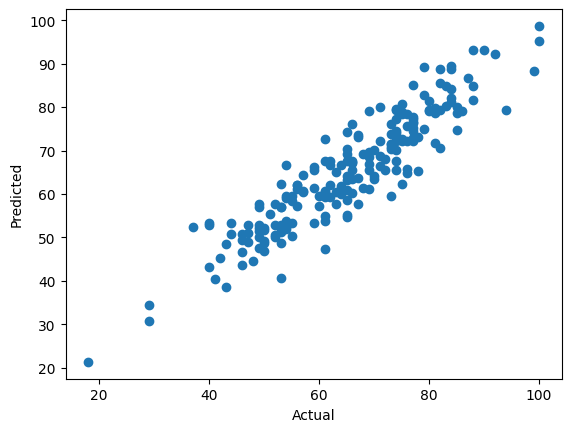

In [54]:
plt.scatter(test_output, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

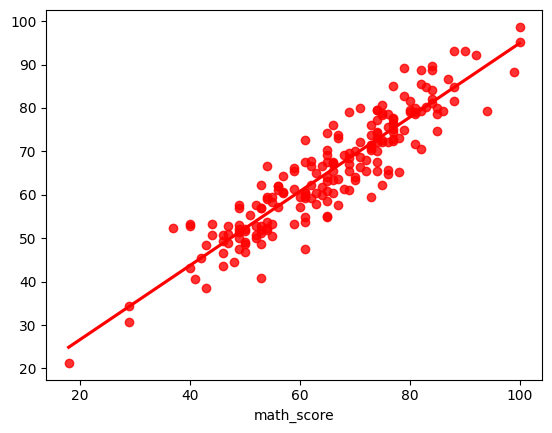

In [56]:
sns.regplot(x=test_output,y=y_pred,ci=None,color ='red');

In [60]:
pred_df = pd.DataFrame({'actual_values' : test_output, 'predicted_values' : y_pred, 'difference' :test_output - y_pred})
pred_df

,actual_values,predicted_values,difference
632,66,67.054966,-1.054966
687,77,77.358301,-0.358301
833,77,76.518711,0.481289
182,50,46.919362,3.080638
831,74,72.241057,1.758943
...,...,...,...
258,70,70.139805,-0.139805
118,51,55.361201,-4.361201
279,73,59.474935,13.525065
458,100,95.282076,4.717924


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ravirajkukade11/train-708d5" on https://jovian.com/
